# Airline Delay Analysis

#### This coursework uses the U.S. Department of Transportation’s Airline On-Time Statistics and Delay Causes dataset, which provides monthly records on domestic flights operated by major U.S. carriers. The dataset includes counts of on-time, delayed, canceled, and diverted flights, along with detailed delay-cause categories such as Air Carrier, Extreme Weather, NAS (National Aviation System), Late-Arriving Aircraft, and Security.

#### Using this dataset of over 400,000 flight records (2003-2025), the coursework develops a full machine learning pipeline for analyzing and predicting airline delays. The goal is to perform exploratory data analysis, engineer meaningful features, train regression and classification models, and deploy an interactive Streamlit application for real-time delay predictions. The project also aims to extract business insights that airlines and airports can use to improve operational efficiency and reduce delays.

## Student ID: 00016395



# Loading the dataset, identify shape and overview

In [100]:
import pandas as pd

df = pd.read_csv('data/Airline_Delay_Cause.csv')
print("Dataset loaded sucessfully!!!")

print(f"Dataset shape: {df.shape}")


Dataset loaded sucessfully!!!
Dataset shape: (409612, 21)


# Exploratory Data Analysis (EDA)

In [ ]:
print(f"Dataset shape: {df.shape[0]} rows x {df.shape[1]} columns")
print("=" * 40)
print("Dataset First 10 rows: ")
df.head(10)


Dataset shape: 409612 rows x 21 columns
Dataset First 10 rows: 


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2025,7,YV,Mesa Airlines Inc.,BWI,"Baltimore, MD: Baltimore/Washington Internatio...",18.0,2.0,1.43,0.00,...,0.0,0.00,0.0,0.0,44.0,32.0,0.0,12.0,0.0,0.0
1,2025,7,YV,Mesa Airlines Inc.,CHS,"Charleston, SC: Charleston AFB/International",48.0,16.0,4.06,3.15,...,0.0,3.30,2.0,0.0,1282.0,331.0,438.0,259.0,0.0,254.0
2,2025,7,YV,Mesa Airlines Inc.,CLE,"Cleveland, OH: Cleveland-Hopkins International",65.0,10.0,3.53,1.00,...,0.0,2.43,2.0,0.0,735.0,151.0,172.0,139.0,0.0,273.0
3,2025,7,YV,Mesa Airlines Inc.,CLT,"Charlotte, NC: Charlotte Douglas International",134.0,31.0,13.19,2.43,...,0.0,4.74,8.0,0.0,2264.0,798.0,303.0,702.0,0.0,461.0
4,2025,7,YV,Mesa Airlines Inc.,CMH,"Columbus, OH: John Glenn Columbus International",61.0,12.0,6.44,0.28,...,0.0,1.69,0.0,0.0,630.0,211.0,17.0,123.0,0.0,279.0
5,2025,7,YV,Mesa Airlines Inc.,COS,"Colorado Springs, CO: City of Colorado Springs...",31.0,5.0,1.84,0.00,...,0.0,2.01,0.0,0.0,668.0,154.0,0.0,67.0,0.0,447.0
6,2025,7,YV,Mesa Airlines Inc.,CRP,"Corpus Christi, TX: Corpus Christi International",19.0,4.0,0.71,0.30,...,0.0,2.29,1.0,0.0,823.0,45.0,6.0,14.0,0.0,758.0
7,2025,7,YV,Mesa Airlines Inc.,CVG,"Cincinnati, OH: Cincinnati/Northern Kentucky I...",75.0,14.0,7.64,1.00,...,0.0,1.79,0.0,0.0,722.0,485.0,24.0,81.0,0.0,132.0
8,2025,7,YV,Mesa Airlines Inc.,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",97.0,23.0,8.09,0.73,...,0.0,9.33,1.0,0.0,2125.0,655.0,65.0,437.0,0.0,968.0
9,2025,7,YV,Mesa Airlines Inc.,DRO,"Durango, CO: Durango La Plata County",31.0,1.0,0.82,0.00,...,0.0,0.00,0.0,0.0,50.0,41.0,0.0,9.0,0.0,0.0


In [74]:
print('Checking datatypes: ')
df.info()
print("=" * 40)

Checking datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409612 entries, 0 to 409611
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 409612 non-null  int64  
 1   month                409612 non-null  int64  
 2   carrier              409612 non-null  object 
 3   carrier_name         409612 non-null  object 
 4   airport              409612 non-null  object 
 5   airport_name         409612 non-null  object 
 6   arr_flights          408952 non-null  float64
 7   arr_del15            408656 non-null  float64
 8   carrier_ct           408952 non-null  float64
 9   weather_ct           408952 non-null  float64
 10  nas_ct               408952 non-null  float64
 11  security_ct          408952 non-null  float64
 12  late_aircraft_ct     408952 non-null  float64
 13  arr_cancelled        408952 non-null  float64
 14  arr_diverted         408952 non-null  float64
 

In [78]:
print('Summary for numerical columns:')
df.describe()

Summary for numerical columns:


,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,409612.000000,409612.000000,408952.000000,408656.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000,408952.000000
mean,2014.715218,6.468014,361.155219,69.864434,20.621496,2.536097,22.230743,0.171458,24.254104,6.744285,0.840910,4218.975002,1324.919900,228.574708,1034.045357,7.148976,1624.278981
std,6.616430,3.442544,993.827182,194.585817,48.715269,9.662785,79.393254,0.821340,74.913717,34.782892,3.834991,12976.256753,3905.756663,909.755462,4362.757658,39.156889,5246.925768
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-19.000000,0.000000,0.000000
25%,2009.000000,3.000000,55.000000,8.000000,2.790000,0.000000,1.410000,0.000000,1.540000,0.000000,0.000000,408.000000,134.000000,0.000000,49.000000,0.000000,77.000000
50%,2015.000000,6.000000,112.000000,21.000000,7.500000,0.530000,4.910000,0.000000,5.550000,1.000000,0.000000,1150.000000,411.000000,23.000000,184.000000,0.000000,347.000000
75%,2021.000000,9.000000,254.000000,52.000000,18.660000,2.000000,13.980000,0.000000,16.270000,4.000000,1.000000,2999.000000,1082.000000,158.000000,558.000000,0.000000,1104.000000
max,2025.000000,12.000000,21977.000000,6377.000000,1886.580000,717.940000,4091.270000,80.560000,2588.130000,4951.000000,256.000000,648300.000000,321792.000000,64550.000000,238440.000000,3760.000000,279153.000000


In [79]:
print('Summary for categorical columns:')
df.describe(include=['object'])

Summary for categorical columns:


,carrier,carrier_name,airport,airport_name
count,409612,409612,409612,409612
unique,38,51,426,460
top,OO,SkyWest Airlines Inc.,DTW,"Detroit, MI: Detroit Metro Wayne County"
freq,47650,47650,3785,3785


In [80]:
print('Checking missing values:')
df.isnull().sum()


Checking missing values:


year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            660
arr_del15              956
carrier_ct             660
weather_ct             660
nas_ct                 660
security_ct            660
late_aircraft_ct       660
arr_cancelled          660
arr_diverted           660
arr_delay              660
carrier_delay          660
weather_delay          660
nas_delay              660
security_delay         660
late_aircraft_delay    660
dtype: int64

In [83]:
print('Checking for duplicates:')
df.duplicated().sum()

Checking for duplicates:


0

### Distribution of arrival delay

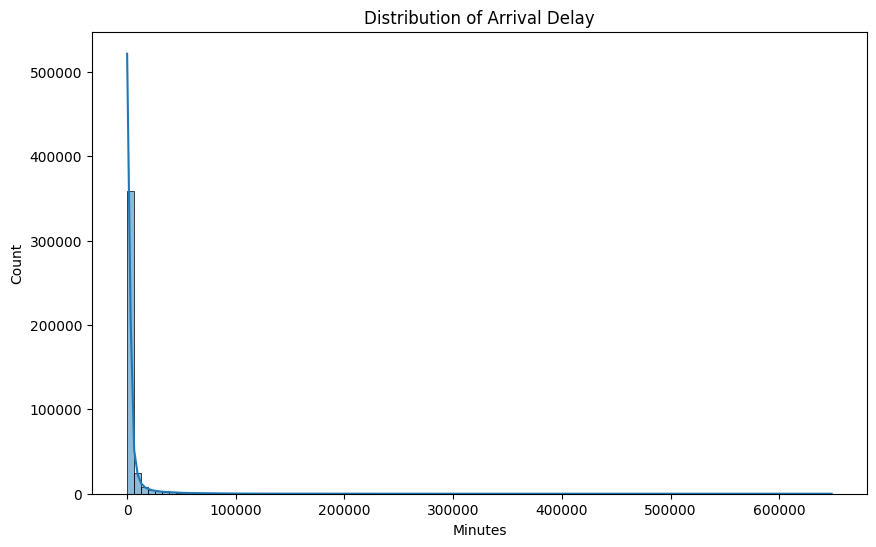

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df['arr_delay'], bins=100, kde=True)
plt.title('Distribution of Arrival Delay')
plt.xlabel('Minutes')
plt.ylabel('Count')
plt.show()

### Correlation Matrix

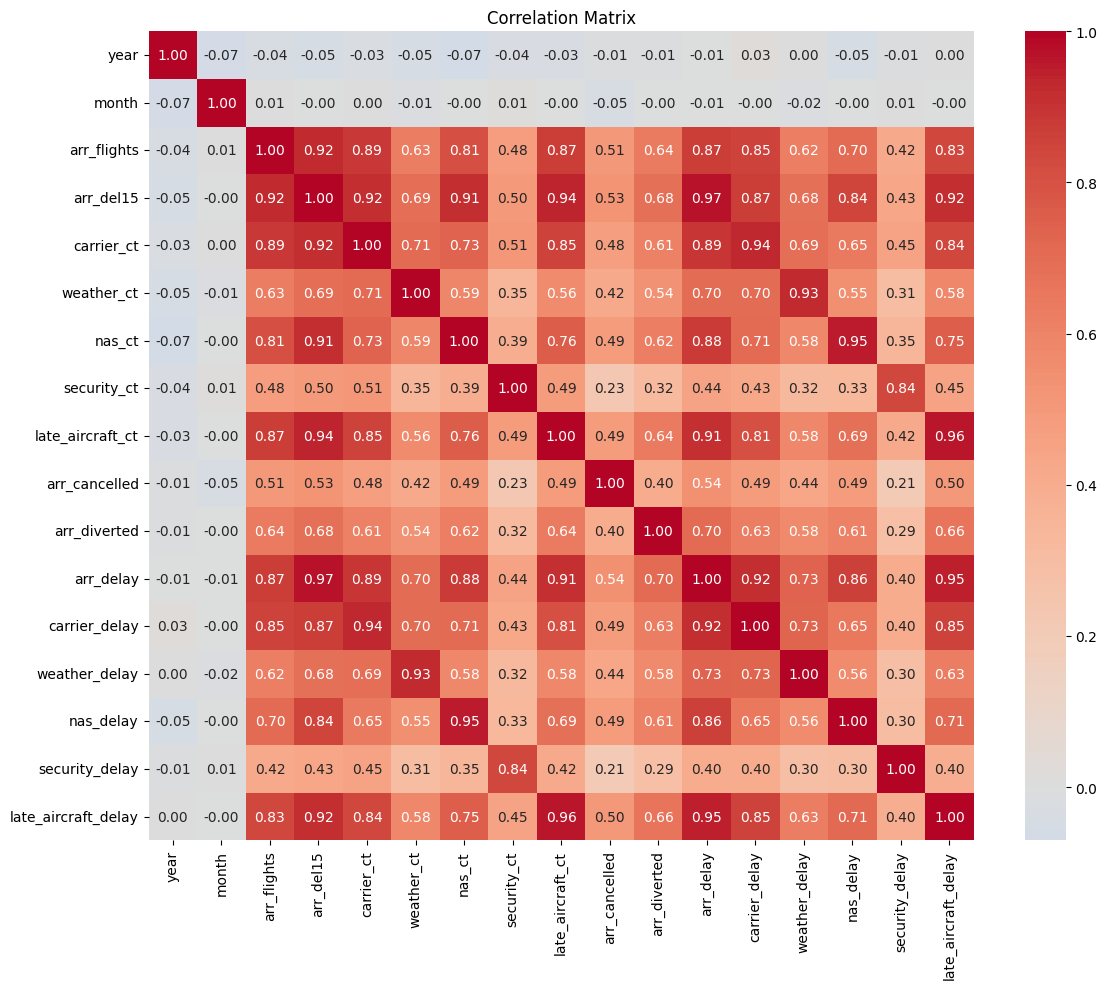

In [101]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()


In [ ]:
if 'arr_del15' in df.columns:
    print("Top Correlations with arr_del15")
    print('='*40)
    corr_with_delay = correlation_matrix['arr_del15'].sort_values(ascending=False)
    print(corr_with_delay.head(10))

Top Correlations with arr_del15
arr_del15              1.000000
arr_delay              0.966788
late_aircraft_ct       0.938067
arr_flights            0.922221
late_aircraft_delay    0.919888
carrier_ct             0.915451
nas_ct                 0.914569
carrier_delay          0.872291
nas_delay              0.842739
weather_ct             0.686470
Name: arr_del15, dtype: float64


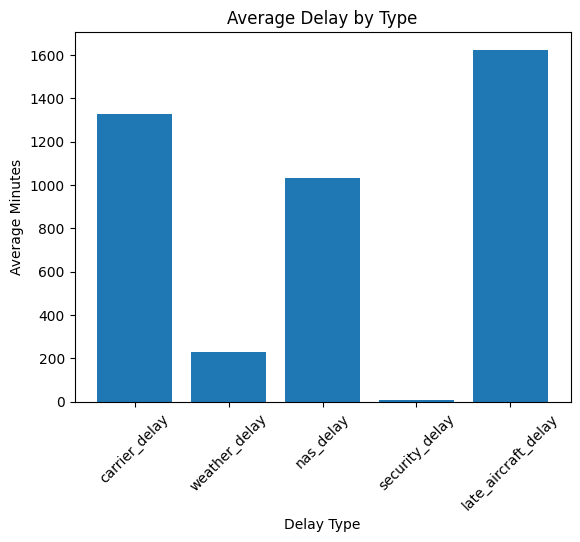

In [89]:
delay_types = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
delay_means = df[delay_types].mean()
plt.bar(delay_means.index, delay_means.values)
plt.title('Average Delay by Type')
plt.xlabel('Delay Type')
plt.ylabel('Average Minutes')
plt.xticks(rotation=45)
plt.show()



#### Delays by carier

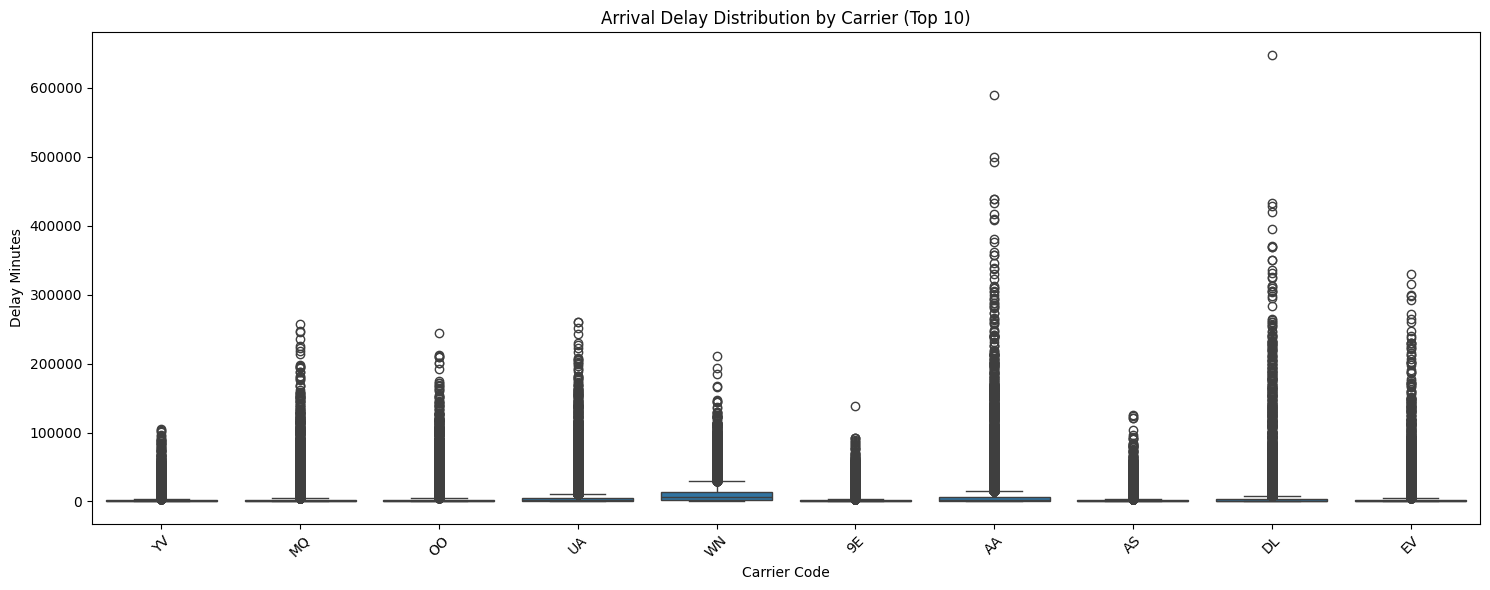

In [91]:
plt.figure(figsize=(15, 6))
top_carriers = df['carrier'].value_counts().nlargest(10).index
df_top = df[df['carrier'].isin(top_carriers)]
sns.boxplot(x='carrier', y='arr_delay', data=df_top)
plt.title('Arrival Delay Distribution by Carrier (Top 10)')
plt.xlabel('Carrier Code')
plt.ylabel('Delay Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Avarage Delay by Month

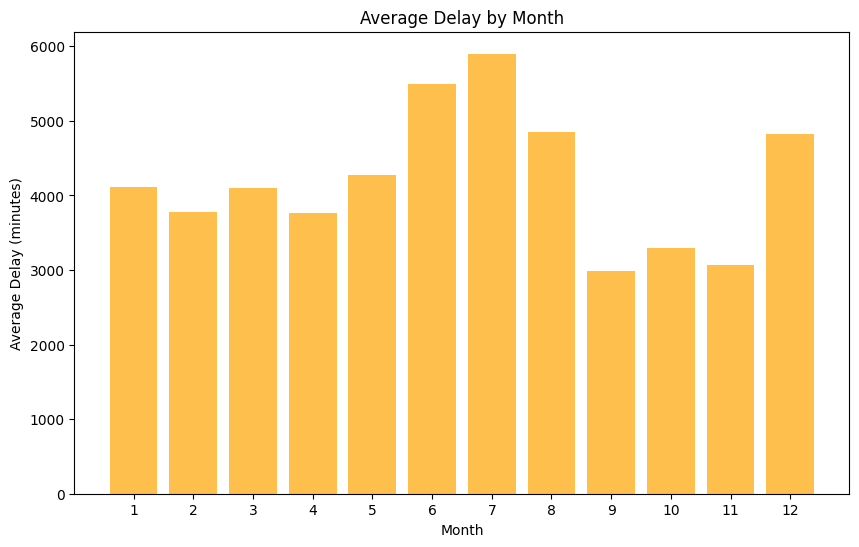

In [92]:
monthly_delay = df.groupby('month')['arr_delay'].mean()

plt.figure(figsize=(10, 6))
plt.bar(monthly_delay.index, monthly_delay.values, color='orange', alpha=0.7)
plt.title('Average Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(1, 13))
plt.show()

#### Cancellation and diversion graohs

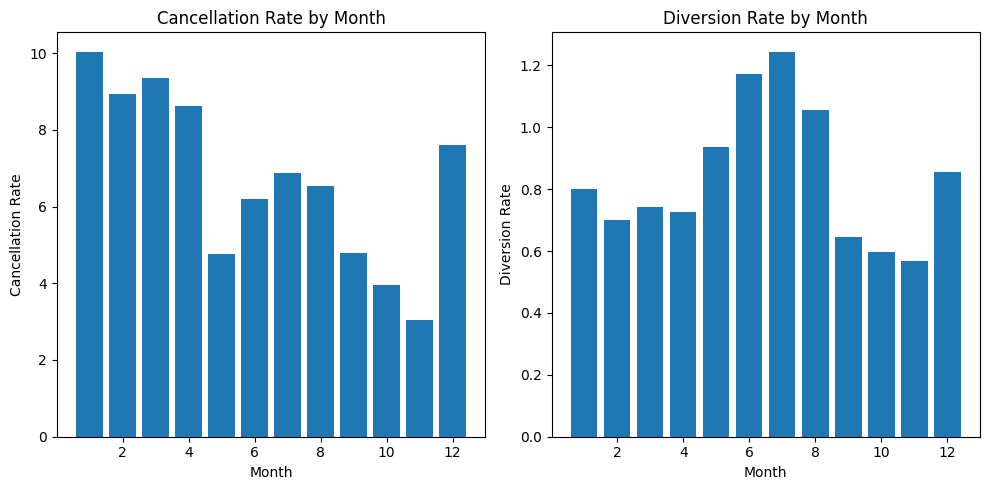

In [94]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
cancellation_rate = df.groupby('month')['arr_cancelled'].mean()
plt.bar(cancellation_rate.index, cancellation_rate.values)
plt.title('Cancellation Rate by Month')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate')

plt.subplot(1, 2, 2)
diversion_rate = df.groupby('month')['arr_diverted'].mean()
plt.bar(diversion_rate.index, diversion_rate.values)
plt.title('Diversion Rate by Month')
plt.xlabel('Month')
plt.ylabel('Diversion Rate')

plt.tight_layout()
plt.show()

### Overal Stats:

In [ ]:
print(f"Total flights analyzed: {df['arr_flights'].sum():,.0f}")
print()
print(f"Most delayed month: {monthly_delay.idxmax()} "
      f"(avg: {monthly_delay.max():.1f} min)")
print(f"Least delayed month: {monthly_delay.idxmin()} "
      f"(avg: {monthly_delay.min():.1f} min)")

Total flights analyzed: 147,695,149
Most delayed month: 7 (avg: 5901.0 min)
Least delayed month: 9 (avg: 2983.3 min)


# Data Preprocessing 


### Handling Missing Values

In [ ]:
df['delay_rate'] = (df['arr_del15'] / df['arr_flights']) * 100  
df['has_delays'] = (df['arr_del15'] > 0).astype(int)

print(f"Indicators created:")
print(f"delay_rate: Percentage of flights delayed 15+ minutes")
print(f"has_delays: Binary indicator (0=no delays, 1=some delays)")

In [ ]:
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values:,}")

In [ ]:
target_missing = df['arr_delay'].isnull().sum()
print(f"Missing values in target variable (arr_delay): {target_missing:,}")

In [ ]:
df_processed = df.copy()

if target_missing > 0:
    print(f"Removing {target_missing:,} rows with missing target values")
    df_processed = df_processed.dropna(subset=['arr_delay'])
    print("Rows with missing target values removed")

In [ ]:
numeric_features = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if 'arr_delay' in numeric_features:
    numeric_features.remove('arr_delay') 

print("Filling missing values with median:")
for col in numeric_features:
    missing_pct = df_processed[col].isnull().mean() * 100
    if missing_pct > 0:
        median_val = df_processed[col].median()
        df_processed[col].fillna(median_val, inplace=True)
        print(f"= {col}: Filled {missing_pct:.1f}% missing values with median ({median_val:.2f})")

In [ ]:
missing_after_cleaning = df_processed.isnull().sum().sum()
print(f"\nTotal missing values after cleaning: {missing_after_cleaning:,}")
print(f"Rows remaining: {len(df_processed):,} ({len(df_processed)/len(df)*100:.1f}% of original)")

df_processed.isnull().sum()

### Outlier Detection

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


In [ ]:
outlier_columns = ['arr_delay', 'arr_flights']
print("Outlier detection results:")

for col in outlier_columns:
    if col in df_processed.columns:
        outliers, lower, upper = detect_outliers_iqr(df_processed, col)
        outlier_pct = (len(outliers) / len(df_processed)) * 100
        print(f"- {col}: {len(outliers):,} outliers ({outlier_pct:.1f}%)")

In [ ]:
plt.figure(figsize=(12, 5))
for i, col in enumerate(['arr_delay', 'arr_flights']):
    if col in df_processed.columns:
        plt.subplot(1, 2, i+1)
        plt.boxplot(df_processed[col].dropna())
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
plt.tight_layout()
plt.show()

### Capping the most extreme outliers

In [ ]:
col = 'arr_delay'
if col in df_processed.columns:
    p95 = df_processed[col].quantile(0.95)
    p5 = df_processed[col].quantile(0.05)
    
    extreme_high = (df_processed[col] > p95).sum()
    extreme_low = (df_processed[col] < p5).sum()
    
    if extreme_high > 0 or extreme_low > 0:
        df_processed[col] = df_processed[col].clip(lower=p5, upper=p95)
        print(f"- {col}: Capped {extreme_high + extreme_low} extreme values")
    else:
        print(f"- {col}: No extreme outliers to cap")

### Creating additianal features

In [ ]:
unnecessary_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
existing_unnecessary = [col for col in unnecessary_cols if col in df_processed.columns]
if existing_unnecessary:
    df_processed = df_processed.drop(columns=existing_unnecessary)
    print(f"Removed unnecessary count columns: {existing_unnecessary}")

In [ ]:
delay_cols = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
existing_delay_cols = [col for col in delay_cols if col in df_processed.columns]
if existing_delay_cols:
    df_processed['total_delay_minutes'] = df_processed[existing_delay_cols].sum(axis=1)
    print(f"Created total_delay_minutes: Sum of all delay types")

In [ ]:
if 'arr_del15' in df_processed.columns and 'arr_flights' in df_processed.columns:
    df_processed['delay_rate'] = (df_processed['arr_del15'] / df_processed['arr_flights']) * 100
    df_processed['delay_rate'] = df_processed['delay_rate'].fillna(0)
    print(f"Updated delay_rate: Percentage of flights delayed 15+ minutes")

In [ ]:
df_processed['season'] = df_processed['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring', 
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})
print(f"Created season: Categorical season based on month")

In [ ]:

holiday_months = [6, 7, 11, 12]
df_processed['is_holiday_period'] = df_processed['month'].isin(holiday_months).astype(int)
print(f"Created is_holiday_period: Binary indicator for high-travel months")

In [ ]:
print(f"Dataset shape after feature engineering: {df_processed.shape}")
print(f"New columns: {df_processed.columns}")

### Categorical Encoding: Converting categorical variables to numerical format

In [ ]:
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns found: {categorical_cols}")

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_processed.copy()

for col in categorical_cols:
    unique_values = df_encoded[col].nunique()
    print(f"- {col}: {unique_values} unique values")
    
    le = LabelEncoder()
    df_encoded[f'{col}_encoded'] = le.fit_transform(df_encoded[col].astype(str))
    df_encoded.drop(col, axis=1, inplace=True)

print(f"Dataset shape after encoding: {df_encoded.shape}")

### Data Scaling

In [ ]:
print(f"Final dataset shape: {df_encoded.shape}")
print(f"Target variable: arr_delay (average delay in minutes)")

# Quick summary of final dataset after proprocessing
print(f"\nDataset summary:")
print(f"Total records: {len(df_encoded):,}")
print(f"Features: {df_encoded.shape[1]-1}") 
print(f"Target variable range: {df_encoded['arr_delay'].min():.1f} to {df_encoded['arr_delay'].max():.1f} minutes")

# ML Model Training

### Prepare Features and Target Variable

In [ ]:
feature_cols = ['year', 'month', 'arr_flights', 'arr_del15', 'carrier_delay', 
                'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
                'total_delay_minutes', 'delay_rate', 'is_holiday_period',
                'carrier_encoded', 'airport_encoded', 'season_encoded']

available_features = [col for col in feature_cols if col in df_encoded.columns]
print(f"Available features for modeling: {len(available_features)}")
print(f"Features: {available_features}")

X = df_encoded[available_features]
y = df_encoded['arr_delay']

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")


### Train-Test Split


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]:,} samples")
print(f"Testing set size: {X_test.shape[0]:,} samples")
print(f"Training set percentage: {(len(X_train)/len(X))*100:.1f}%")
print(f"Testing set percentage: {(len(X_test)/len(X))*100:.1f}%")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import time

print("Libraries imported successfully!")

### Model Training: Linear Regression

In [ ]:
start_time = time.time()

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

training_time_lr = time.time() - start_time

print(f"Linear Regression trained in {training_time_lr:.2f} seconds")
print(f"Linear Regression Results:")
print(f"R² Score: {lr_r2:.4f}")
print(f"RMSE: {lr_rmse:.2f} minutes")
print(f"MAE: {lr_mae:.2f} minutes")

### Model Training: Random Forest Regression

In [ ]:
start_time = time.time()

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

training_time_rf = time.time() - start_time

print(f"Random Forest trained in {training_time_rf:.2f} seconds")
print(f"Random Forest Results:")
print(f"R² Score: {rf_r2:.4f}")
print(f"RMSE: {rf_rmse:.2f} minutes")
print(f"MAE: {rf_mae:.2f} minutes")

#### Model Training: K-Nearest Neighbors

In [ ]:
start_time = time.time()

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

knn_pipeline.fit(X_train, y_train)

y_pred_knn = knn_pipeline.predict(X_test)

knn_mse = mean_squared_error(y_test, y_pred_knn)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_r2 = r2_score(y_test, y_pred_knn)

training_time_knn = time.time() - start_time

print(f"K-Nearest Neighbors trained in {training_time_knn:.2f} seconds")
print(f"KNN Results:")
print(f"R² Score: {knn_r2:.4f}")
print(f"RMSE: {knn_rmse:.2f} minutes")
print(f"MAE: {knn_mae:.2f} minutes")

#### Model Training: Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

start_time = time.time()

dt_model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=20,  
    min_samples_leaf=10,    
    random_state=42
)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

training_time_dt = time.time() - start_time

print(f"Decision Tree trained in {training_time_dt:.2f} seconds")
print(f"Decision Tree Results:")
print(f"R² Score: {dt_r2:.4f}")
print(f"RMSE: {dt_rmse:.2f} minutes")
print(f"MAE: {dt_mae:.2f} minutes")